## Exercise

1. Load the dataset **`california_housing_train.csv`**.
2. Use the provided model architecture to train the data.
3. Monitor and record both **training loss** and **validation loss** during the training process.
4. Plot the loss curves to visually compare the model’s performance on training and validation data.

### Notes
- Split the dataset into **training** and **validation** sets before training.
- Watch for signs of **overfitting** or **underfitting** in the loss curves.
- Report your final training and validation losses at the end of training.


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
x = df.drop(['median_house_value'], axis= 1)
y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.tensor(x_train.values, dtype = torch.float32, device = device)
y_train_tensor = torch.tensor(y_train.values.reshape(-1,1), dtype = torch.float32, device = device)

x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32, device = device)
y_test_tensor = torch.tensor(y_test.values.reshape(-1,1), dtype = torch.float32, device = device)

x_mu = x_train_tensor.mean(axis = 0)
x_std = x_train_tensor.std(axis = 0)
x_train_tensor_scaled = (x_train_tensor - x_mu)/(x_std)

y_mu = y_train_tensor.mean()
y_std = y_train_tensor.std()
y_train_tensor_scaled = (y_train_tensor - y_mu)/(y_std)

x_test_tensor_scaled = (x_test_tensor - x_mu)/(x_std)
y_test_tensor_scaled = (y_test_tensor - y_mu)/(y_std)

In [28]:
from torch import nn

class ManualRegresion(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    return x


Epoch 1: train loss = 1.1765588521957397, val loss = 1.1773452758789062
Epoch 500: train loss = 0.6364377737045288, val loss = 0.6313725113868713
Epoch 1000: train loss = 0.4464797377586365, val loss = 0.4359516501426697
Epoch 1500: train loss = 0.3688180148601532, val loss = 0.3562955856323242
Epoch 2000: train loss = 0.3522012233734131, val loss = 0.3397154211997986
Epoch 2500: train loss = 0.34097179770469666, val loss = 0.3295256197452545
Epoch 3000: train loss = 0.33198651671409607, val loss = 0.32177793979644775
Epoch 3500: train loss = 0.32538560032844543, val loss = 0.31649622321128845
Epoch 4000: train loss = 0.3210557699203491, val loss = 0.31332817673683167
Epoch 4500: train loss = 0.31800544261932373, val loss = 0.3109425902366638
Epoch 5000: train loss = 0.31557372212409973, val loss = 0.30908286571502686
Epoch 5500: train loss = 0.3133687674999237, val loss = 0.30749377608299255
Epoch 6000: train loss = 0.311290979385376, val loss = 0.3059799075126648
Epoch 6500: train lo

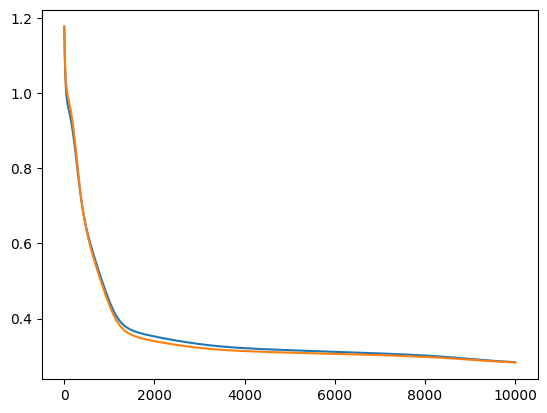

In [29]:
from torch import optim
import matplotlib.pyplot as plt

torch.manual_seed(42)
lr = .01
input_dim = x_train_tensor.shape[1]
model = ManualRegresion(input_dim).to(device)
optimizer = optim.SGD(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
n_epochs = 10000
train_losses = []
val_losses = []

for epoch in range(n_epochs):
  model.train()
  optimizer.zero_grad()
  y_pred = model(x_train_tensor_scaled)
  loss = loss_fn(y_train_tensor_scaled, y_pred)
  loss.backward()
  optimizer.step()
  train_losses.append(loss.detach().cpu().item())

  model.eval()
  with torch.no_grad():
    y_pred = model(x_test_tensor_scaled)
    test_loss = loss_fn(y_test_tensor_scaled, y_pred)
    val_losses.append(test_loss.cpu().item())


  if (epoch + 1) % 500 == 0 or epoch == 0:
    print(f'Epoch {epoch + 1}: train loss = {loss.detach().cpu().item()}, val loss = {test_loss.cpu().item()}')

plt.plot(range(n_epochs), train_losses)
plt.plot(range(n_epochs), val_losses)
plt.show()

### Exercise: Build a Deep Model to Demonstrate Overfitting

**Instructions:**

You will create a deep fully-connected neural network for a regression task.  
The architecture will be intentionally large compared to the dataset size so that overfitting can be observed.

**Model Architecture:**
- **Input layer**: number of neurons equal to the number of input features (`input_dim`).
- **Hidden Layer 1**: 256 neurons, ReLU activation.
- **Hidden Layer 2**: 128 neurons, ReLU activation.
- **Hidden Layer 3**: 64 neurons, ReLU activation.
- **Hidden Layer 4**: 32 neurons, ReLU activation.
- **Hidden Layer 5**: 16 neurons, ReLU activation.
- **Output Layer**: 1 neuron (no activation).

**Steps:**
1. Implement the above architecture using `torch.nn.Module`.
2. Train the model **only on the first 100 samples** of the training dataset (`X_train`, `y_train`).
3. Train for a sufficient number of epochs (e.g., 5000) to let the model memorize the training data.
4. Record both **training loss** and **validation loss** over epochs.
5. Plot both curves to observe:
   - Training loss decreasing close to zero.
   - Validation loss increasing after some point (a clear sign of overfitting).

**Expected Output:**
- A plot with two curves:  
  - **Training loss** continuously decreasing.  
  - **Validation loss** starting low but increasing after some epochs.
- Clear evidence that the model has memorized the small training set instead of generalizing.


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
x = df.drop(['median_house_value'], axis= 1)
y = df['median_house_value']
x_train = x.iloc[:100]
y_train = y.iloc[:100]
x_test = x.iloc[100:]
y_test = y.iloc[100:]

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.tensor(x_train.values , dtype = torch.float32, device = device)
y_train_tensor = torch.tensor(y_train.values.reshape(-1,1) , dtype = torch.float32, device = device)
x_test_tensor = torch.tensor(x_test.values , dtype = torch.float32, device = device)
y_test_tensor = torch.tensor(y_test.values.reshape(-1,1) , dtype = torch.float32, device = device)

In [32]:
from torch import nn
class Overfitmodel(nn.Module):
  def __init__(self,input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,32)
    self.fc5 = nn.Linear(32,1)
    self.relu = nn.ReLU()

  def forward(self,x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.relu(self.fc3(x))
    x = self.relu(self.fc4(x))
    x = self.fc5(x)
    return x

In [33]:
print("Max X:", x_train_tensor.max().item())
print("Min X:", x_train_tensor.min().item())
print("Max y:", y_train_tensor.max().item())
print("Min y:", y_train_tensor.min().item())


Max X: 7650.0
Min X: -115.58999633789062
Max y: 146300.0
Min y: 25000.0


In [34]:
#Scaling
'''
x_mu = x_train_tensor.mean(axis = 0)
x_std = x_train_tensor.std(axis=0)
x_train_tensor_scaled = (x_train_tensor - x_mu)/(x_std)
x_test_tensor_scaled = (x_test_tensor - x_mu)/(x_std)

y_mu = y_train_tensor.mean()
y_std = y_train_tensor.std()
y_train_tensor_scaled = (y_train_tensor - y_mu)/(y_std)
y_test_tensor_scaled = (y_test_tensor - y_mu)/(y_std)

x_mu = torch.tensor(x.values, dtype=torch.float32, device=device).mean(axis=0)
x_std = torch.tensor(x.values, dtype=torch.float32, device=device).std(axis=0)''' #this scaling doesn't works here
#We must scale by using the ENTIRE dataset statistics, not just training


y_mu = torch.tensor(y.values, dtype=torch.float32, device=device).mean()
y_std = torch.tensor(y.values, dtype=torch.float32, device=device).std()
y_train_tensor_scaled = (y_train_tensor - y_mu)/(y_std)
y_test_tensor_scaled = (y_test_tensor - y_mu)/(y_std)
x_train_tensor_scaled = (x_train_tensor - x_mu)/(x_std)
x_test_tensor_scaled = (x_test_tensor - x_mu)/(x_std)

In [35]:
print("Max X:", x_train_tensor_scaled.max().item())
print("Min X:", x_train_tensor_scaled.min().item())
print("Max y:", y_train_tensor_scaled.max().item())
print("Min y:", y_train_tensor_scaled.min().item())
print("Max X:", x_test_tensor_scaled.max().item())
print("Min X:", x_test_tensor_scaled.min().item())
print("Max y:", y_test_tensor_scaled.max().item())
print("Min y:", y_test_tensor_scaled.min().item())

Max X: 3.2323150634765625
Min X: -1.8778091669082642
Max y: -0.5259433388710022
Min y: -1.5717793703079224
Max X: 29.51626968383789
Min X: -2.392026901245117
Max y: 2.523630142211914
Min y: -1.6580069065093994


In [36]:
from torch import optim
torch.manual_seed(42)
input_dim = x_train_tensor.shape[1]
model = Overfitmodel(input_dim).to(device)
lr = 0.001
train_losses = []
val_losses = []
epoches = 5000
optimizer = optim.SGD(model.parameters(), lr = lr)
loss_fn = nn.MSELoss()

for epoch in range(epoches):
  model.train()
  optimizer.zero_grad()
  y_pred = model(x_train_tensor_scaled)
  train_loss = loss_fn(y_train_tensor_scaled, y_pred)
  train_loss.backward()
  optimizer.step()
  train_losses.append(train_loss.detach().cpu().item())

  model.eval()
  with torch.no_grad():
    y_pred = model(x_test_tensor_scaled)
    test_loss = loss_fn(y_test_tensor_scaled, y_pred)
    val_losses.append(test_loss.cpu().item())
  if epoch % 500 == 0 or epoch ==0:
    print(f'Epoch {epoch+1}: train loss = {train_loss.detach().cpu().item()}, val loss = {test_loss.cpu().item()}')


Epoch 1: train loss = 1.4298644065856934, val loss = 1.0017499923706055
Epoch 501: train loss = 0.047426529228687286, val loss = 1.757145643234253
Epoch 1001: train loss = 0.032726604491472244, val loss = 1.8671363592147827
Epoch 1501: train loss = 0.030217740684747696, val loss = 1.8591480255126953
Epoch 2001: train loss = 0.028046438470482826, val loss = 1.8499655723571777
Epoch 2501: train loss = 0.026114730164408684, val loss = 1.8399486541748047
Epoch 3001: train loss = 0.024477500468492508, val loss = 1.829811930656433
Epoch 3501: train loss = 0.023046260699629784, val loss = 1.8190104961395264
Epoch 4001: train loss = 0.021763043478131294, val loss = 1.8081841468811035
Epoch 4501: train loss = 0.020644014701247215, val loss = 1.797767162322998


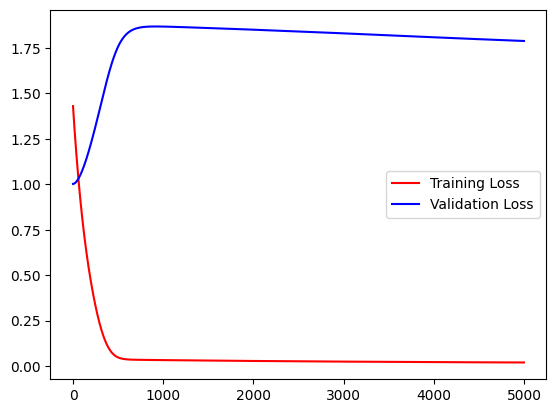

In [37]:
import matplotlib.pyplot as plt
plt.plot(range(epoches),train_losses , label='Training Loss', color = 'red')
plt.plot(range(epoches),val_losses , label='Validation Loss', color = 'blue')
plt.legend()
plt.show()




### Exercise: Build a Simple Model to Demonstrate Underfitting

**Instructions:**

You will create an extremely simple neural network for a regression task in order to observe **underfitting**.

**Model Architecture:**
- **Input Layer**: number of neurons equal to the number of input features (`input_dim`).
- **Output Layer**: 1 neuron (no hidden layers, no activation function).

**Steps:**
1. Implement the above architecture using `torch.nn.Module`.
2. Train the model on the **entire training dataset** (no sample limitation).
3. Use the same training procedure as before (same optimizer and loss function), but **train for fewer epochs** than in the previous exercises.
4. Record both **training loss** and **validation loss** over epochs.
5. Plot both curves to observe:
   - Training loss remains relatively high.
   - Validation loss also remains high.
   - Both indicate that the model is too simple to capture the complexity of the data (underfitting).

**Expected Output:**
- A loss plot showing minimal improvement over epochs.
- Similar loss values for both training and validation sets, but both being higher than desired.



### Exercise: Build a Simple Model to Demonstrate Underfitting

**Instructions:**

You will create an extremely simple neural network for a regression task in order to observe **underfitting**.

**Model Architecture:**
- **Input Layer**: number of neurons equal to the number of input features (`input_dim`).
- **Output Layer**: 1 neuron (no hidden layers, no activation function).

**Steps:**
1. Implement the above architecture using `torch.nn.Module`.
2. Train the model on the **entire training dataset** (no sample limitation).
3. Use the same training procedure as before (same optimizer and loss function), but **train for fewer epochs** than in the previous exercises.
4. Record both **training loss** and **validation loss** over epochs.
5. Plot both curves to observe:
   - Training loss remains relatively high.
   - Validation loss also remains high.
   - Both indicate that the model is too simple to capture the complexity of the data (underfitting).

**Expected Output:**
- A loss plot showing minimal improvement over epochs.
- Similar loss values for both training and validation sets, but both being higher than desired.



In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
x = df.drop(['median_house_value'], axis= 1)
y = df['median_house_value']

In [107]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.tensor(x.values, dtype=torch.float32, device= device)
y_train_tensor = torch.tensor(y.values.reshape(-1,1) , dtype=torch.float32, device= device)
x_test_tensor = torch.tensor(x.values, dtype=torch.float32, device= device)
y_test_tensor = torch.tensor(y.values.reshape(-1,1) , dtype=torch.float32, device= device)

In [108]:
#Scaling
y_mu = torch.tensor(y.values, dtype=torch.float32, device=device).mean()
y_std = torch.tensor(y.values, dtype=torch.float32, device=device).std()
y_train_tensor_scaled = (y_train_tensor - y_mu)/(y_std)
y_test_tensor_scaled = (y_test_tensor - y_mu)/(y_std)
x_train_tensor_scaled = (x_train_tensor - x_mu)/(x_std)
x_test_tensor_scaled = (x_test_tensor - x_mu)/(x_std)

In [109]:
#nn model

from torch import nn
class  UnderfittingModel(nn.Module):
  def __init__(self,input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim,1)

  def forward(self,x):
    x = self.fc1(x)
    return x

In [110]:
from torch import optim
torch.manual_seed(42)
train_losses = []
val_losses = []
lr = 0.04
n_epoches = 50
loss_fn = nn.MSELoss()
input_dim = x_train_tensor.shape[1]
model = UnderfittingModel(input_dim).to(device)
optimizer = optim.SGD(model.parameters(),lr = lr)

for epoch in range(n_epoches):
  model.train()
  y_pred = model(x_train_tensor_scaled)
  train_loss = loss_fn(y_train_tensor_scaled, y_pred)
  train_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  train_losses.append(train_loss.detach().cpu().item())

  model.eval()
  with torch.no_grad():
    y_pred = model(x_test_tensor_scaled)
    test_loss = loss_fn(y_test_tensor_scaled,y_pred)
    val_losses.append(test_loss.cpu().item())

  if epoch % 5 == 0 or epoch == 0 :
    print(f'Epoch {epoch +1 } trainning loss = {train_loss.detach().cpu().item()} and validation loss = {test_loss.cpu().item()}')


Epoch 1 trainning loss = 1.0139470100402832 and validation loss = 0.9431795477867126
Epoch 6 trainning loss = 0.7624508142471313 and validation loss = 0.7325159311294556
Epoch 11 trainning loss = 0.6472041606903076 and validation loss = 0.6321049928665161
Epoch 16 trainning loss = 0.5873539447784424 and validation loss = 0.5790613293647766
Epoch 21 trainning loss = 0.5533182621002197 and validation loss = 0.548273503780365
Epoch 26 trainning loss = 0.5317346453666687 and validation loss = 0.5282924175262451
Epoch 31 trainning loss = 0.5163872241973877 and validation loss = 0.5137737393379211
Epoch 36 trainning loss = 0.5043376088142395 and validation loss = 0.5021832585334778
Epoch 41 trainning loss = 0.49417319893836975 and validation loss = 0.4922979772090912
Epoch 46 trainning loss = 0.485199898481369 and validation loss = 0.4835135042667389


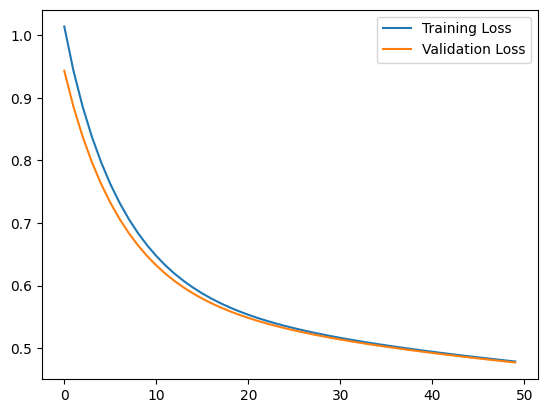

In [111]:
#plotting
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()